In [1]:
from sklearn.cluster import KMeans
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
kospi = fdr.DataReader("KS11")
kospi["Change"] = kospi["Change"] * 100
kospi = kospi.drop(
    ["Open", "High", "Low", "Close", "Volume", "UpDown", "Comp", "Amount", "MarCap"],
    axis=1,
)
kospi.rename(columns={"Change": "KOSPI"}, inplace=True)
kospi.head()

,KOSPI
Date,
2001-06-11,-2.18
2001-06-12,-0.18
2001-06-13,1.14
2001-06-14,-0.05
2001-06-15,0.85


### 데이터분리


In [3]:
nasdaq = fdr.DataReader("IXIC", "2001-06-08")
nasdaq["Change"] = round(nasdaq["Adj Close"].pct_change() * 100, 2)
nasdaq = nasdaq.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
nasdaq = nasdaq.drop("2001-06-08", axis=0)
nasdaq.rename(columns={"Change": "NASDAQ"}, inplace=True)
nasdaq


,NASDAQ
Date,
2001-06-11,-2.00
2001-06-12,-0.04
2001-06-13,-2.23
2001-06-14,-3.66
2001-06-15,-0.77
...,...
2024-04-26,2.03
2024-04-29,0.35
2024-04-30,-2.04


In [4]:
sap = fdr.DataReader("S&P500", "2001-06-08", "2024-01-23")
sap["Change"] = round(sap["Adj Close"].pct_change() * 100, 2)
sap = sap.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
sap = sap.drop("2001-06-08", axis=0)
sap.rename(columns={"Change": "S&P"}, inplace=True)
sap.head()

,S&P
Date,
2001-06-11,-0.84
2001-06-12,0.12
2001-06-13,-1.13
2001-06-14,-1.75
2001-06-15,-0.45


In [5]:
usa_treasury = fdr.DataReader("US10YT", "2001-06-08", "2024-01-23")
usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)
usa_treasury = usa_treasury.drop(
    ["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1
)
usa_treasury = usa_treasury.drop("2001-06-08", axis=0)
usa_treasury = usa_treasury.rename(columns={"Change": "USA_TREASURY"})
usa_treasury

C:\Users\user\AppData\Local\Temp\ipykernel_10384\2256364050.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)


,USA_TREASURY
Date,
2001-06-11,-0.86
2001-06-12,-0.89
2001-06-13,0.32
2001-06-14,-0.80
2001-06-15,0.25
...,...
2024-01-16,2.94
2024-01-17,0.98
2024-01-18,0.93


In [6]:
japan = fdr.DataReader("N225", "2001-06-08", "2024-01-23")
japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)
japan = japan.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
japan = japan.drop("2001-06-08", axis=0)
japan.rename(columns={"Change": "Nikkei"}, inplace=True)
japan

C:\Users\user\AppData\Local\Temp\ipykernel_10384\1959846037.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)


,Nikkei
Date,
2001-06-11,-1.52
2001-06-12,-2.92
2001-06-13,-0.13
2001-06-14,0.18
2001-06-15,-0.44
...,...
2024-01-16,-0.79
2024-01-17,-0.40
2024-01-18,-0.03


In [7]:
usd_krw = fdr.DataReader("USD/KRW", "2001-06-08")
usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)
usd_krw = usd_krw.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
usd_krw = usd_krw.rename(columns={"Change": "USD/KRW"})
usd_krw

C:\Users\user\AppData\Local\Temp\ipykernel_10384\1180829902.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)


,USD/KRW
Date,
2003-12-01,NaN
2003-12-02,-0.28
2003-12-03,-0.21
2003-12-04,-0.20
2003-12-05,-0.45
...,...
2024-04-29,0.39
2024-04-30,-0.18
2024-05-01,0.79


In [8]:
result_data = pd.concat([kospi, nasdaq, sap, usd_krw, usa_treasury, japan], axis=1)
result_data.fillna(result_data.mean(), inplace=True)
result_data = round(result_data, 2)

In [9]:
result_data.to_csv("./data/kospi_result_data.csv")

### 군집분류

In [10]:
X = result_data[["NASDAQ", "S&P", "USD/KRW", "USA_TREASURY", "Nikkei"]]
y = result_data["KOSPI"]

#### kMean으로 평균 만들기

### t-sen을 통한 데이터 확인
T-sen은 군집이 분류되서 나타난다. 분산. 티센은 연산량이 많아져서 컬럼마다 평균값을 구해야한다. 군집은 kmean은 필시 평균값 필요. 

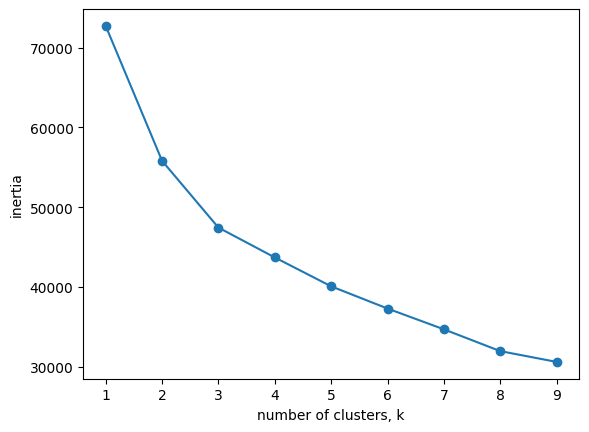

In [11]:
ks = range(1, 10)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

In [12]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans[1:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 1])

In [13]:
import time
from sklearn.manifold import TSNE

n_sne = X.shape[0]

time_start = time.time()
tsne = TSNE(
    n_components=2, verbose=1, perplexity=32, n_iter=1000, random_state=0, angle=0.5
)
tsne_results = tsne.fit_transform(X)
print("t-SNE done! Time elapsed: {} seconds".format(time.time() - time_start))

[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 5975 samples in 0.009s...
[t-SNE] Computed neighbors for 5975 samples in 0.215s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5975
[t-SNE] Computed conditional probabilities for sample 2000 / 5975
[t-SNE] Computed conditional probabilities for sample 3000 / 5975
[t-SNE] Computed conditional probabilities for sample 4000 / 5975
[t-SNE] Computed conditional probabilities for sample 5000 / 5975
[t-SNE] Computed conditional probabilities for sample 5975 / 5975
[t-SNE] Mean sigma: 0.384289
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.905388
[t-SNE] KL divergence after 1000 iterations: 1.557347
t-SNE done! Time elapsed: 14.985927104949951 seconds


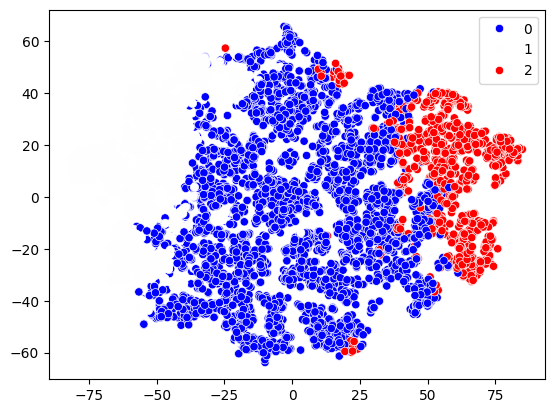

In [14]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_kmeans, s=20, cmap="bwr")
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y_kmeans, palette="bwr")
plt.show()

## X과 코스피 대비 수익률, 특징값 3개만 추출해서 X값 어디에 넣는다. 클러스터에 각자 포지션을 다 넣는데  3차원에서 해석이 안돼서 특징 2개를 가지고 압착을 시켜 0,1,2로 표현. 
## 0,1,2 에 대한 군집결과 분석
## 비지도 문제를 풀어야 할 때 TSEN으로 특성파악해서 KMEAN으로 특성을 분석한다음 클러스터로 나눈다 PCA 같은 걸로 특성 확인
## 도메인 영역이 아니라 도구가 제한적이다. 
## 문제풀때는 일단 KMEAN을 통해서 INTERATE 를 보고  범위를 특정해서  매개변수를 넣고 분류 한다음 클러스터를 구한다. 티센에 넣어 데이터파악. 표까지 나와야한다.판다스 표에 넣어서 어쩌고 저쩌고. 
## 판다스를 잘쓰세요들~ 

In [15]:
df1 = result_data.copy()

In [16]:
df1["cluster"] = y_kmeans
df1

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52,1
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92,0
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13,0
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18,1
2001-06-15,0.85,-0.77,-0.45,0.01,0.25,-0.44,0
...,...,...,...,...,...,...,...
2024-04-29,1.17,0.35,0.03,0.39,0.03,0.03,0
2024-04-30,0.17,-2.04,0.03,-0.18,0.03,0.03,0
2024-05-01,0.03,-0.33,0.03,0.79,0.03,0.03,0


In [17]:
## 군집 0 ~ 3 까지 분류된거를 변수명에 추가
cluster_2 = df1[df1["cluster"] == 2]
cluster_1 = df1[df1["cluster"] == 1]
cluster_0 = df1[df1["cluster"] == 0]

In [18]:
cluster_total = df1.groupby("cluster").mean()
cluster_total["return"] = cluster_total.T.mean()
cluster_total["std"] = cluster_total.T.std()
cluster_total = cluster_total.T
cluster_total

cluster,0,1,2
KOSPI,0.110205,-0.397085,0.311070
NASDAQ,0.303830,-1.264408,0.763326
S&P,0.245668,-1.093768,0.683464
USD/KRW,-0.018667,0.096690,-0.012839
USA_TREASURY,-0.007668,-2.492496,3.540360
Nikkei,0.119158,-0.494123,0.365180
return,0.125421,-0.940865,0.941760
std,0.119047,0.827387,1.189730


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwarg

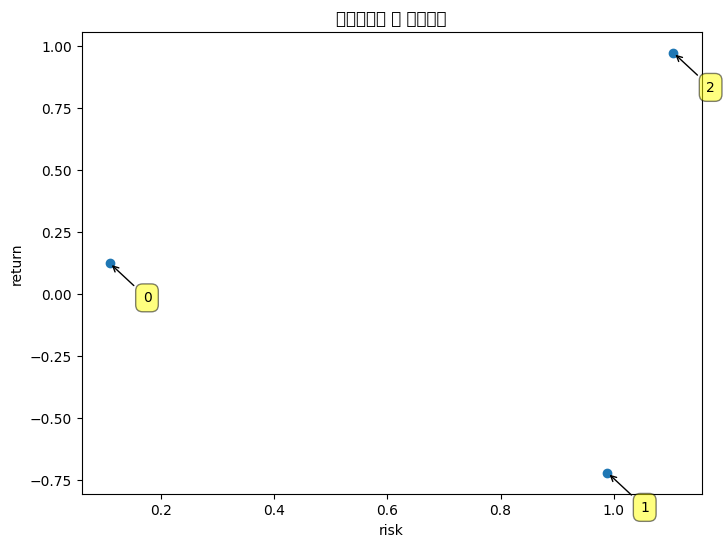

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_total.std(), cluster_total.mean())
plt.xlabel("risk")
plt.ylabel("return")
plt.title("평균수익률 및 표준편차")
for label, x, y in zip(
    cluster_total.columns, cluster_total.std(), cluster_total.mean()
):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(30, -30),
        textcoords="offset points",
        ha="right",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )